<img src="../fasp/runner/credits/images/FASPNotebook08.jpg" style="float: right;">


### Validate same compute on AWS and GCP
Runs the compute on two different platforms to check the same results are obtained on both platforms.
This prepares for running a job such as FASP scripts.
This script runs the same work as FASPScript8 and uses FASPRunner twice.

In [1]:
from fasp.runner import FASPRunner

# The implementations we're using
from fasp.loc import crdcDRSClient
from fasp.workflow import sbcgcWESClient, GCPLSsamtools
from fasp.search import DiscoverySearchClient

faspRunner = FASPRunner('FASPNotebook08')
settings = faspRunner.settings

sbProject = settings['SevenBridgesProject']

# Step 1 - Discovery
# query for relevant DRS objects
searchClient = DiscoverySearchClient('https://ga4gh-search-adapter-presto-public.prod.dnastack.com/')

# Step 3 - set up the classes that runs samtools on the two clouds
location = 'projects/{}/locations/{}'.format(settings['GCPProject'], settings['GCPPipelineRegion'])
sam2 = GCPLSsamtools(location, settings['GCPOutputBucket'])
mysams = {'s3':sbcgcWESClient(settings['SevenBridgesProject']),
          'gs': sam2}

query = '''
    SELECT 'case_'||associated_entities__case_gdc_id , file_id
    FROM search_cloud.cshcodeathon.gdc_rel24_filedata_active 
    where data_format = 'BAM' 
    and project_disease_type = 'Breast Invasive Carcinoma'
    limit 3'''


for sam, samClient in mysams.items():
    drsClient = crdcDRSClient('~/.keys/crdc_credentials.json', sam)
    samClient = mysams[sam]
    faspRunner.configure(searchClient, drsClient, samClient)
    faspRunner.runQuery(query, 'cross cloud SAMTools validation')

Running <ipython-input-1-70d59b256f3a>
Running query

    SELECT 'case_'||associated_entities__case_gdc_id , file_id
    FROM search_cloud.cshcodeathon.gdc_rel24_filedata_active 
    where data_format = 'BAM' 
    and project_disease_type = 'Breast Invasive Carcinoma'
    limit 3
_Retrieving the query_
____Page1_______________
____Page2_______________
____Page3_______________
____Page4_______________
____Page5_______________
subject=case_1b703058-e596-45bc-80fe-8b98d545c2e2, drsID=030e5e74-6461-4f05-a399-de8e470bc056
workflow submitted, run:a7afbcb2-8e8c-425d-b834-01ac78c1d94e
____________________________________________________________
subject=case_a947a945-4721-45cc-bc45-13b8ea41c10e, drsID=04c68898-ddac-4e15-9f9a-5bf278d55e4a
workflow submitted, run:617c3322-2759-4e4b-9c7a-54d7dd123e01
____________________________________________________________
subject=case_c462e422-eb8d-4daf-9897-2a9c6cbd783a, drsID=00589653-5840-4c11-8572-5aa7d00a73f8
workflow submitted, run:4b551c3e-c403-41dd-ab

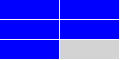

In [2]:
faspRunner.getFASPicon()